<a href="https://colab.research.google.com/github/solisti/Group1Project3/blob/experimental/Project3_ImageTextTranslator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Text Translator
Click the "Open in Colab" link to open this Jupyter Notebook in Google Colab. In Google Colab, click on the file icon (with up arrow) in the Files pane on the left to upload an image file and a font file. By default, files are placed in /contents, which is also the default working directory. Refresh the Files pane by clicking the folder icon with round arrow.

In [ ]:
# Run this block to install pytesseract and translate (Python libraries)
# and tesseract-ocr (from Ubuntu repo), which are not installed
# in Google's Ubuntu vm. Need to re-run the block if session times out 
# after period of un-use. But the installs are fast.

# The following will show whether or not pytesseract is installed.
# It just prints 0 if installed, or else an error message.
# ! python -c "import pytesseract"
# ! echo $?

# PIL is already installed in Google's Ubuntu vm (Bionic, 18.0.4)
# ! python -c "import PIL"
# ! echo $?

# In newer Debian and Ubuntu repos the default is now Pillow.
# To install on your own Debian/Ubuntu system: 
# apt install python3-pil and
# apt install python3-pil.imgagetk (that installs Pillow now). May not need pil.imagetk.

# PIL (Pillow) tutorial: https://pillow.readthedocs.io/en/stable/handbook/tutorial.html

# next istall is documented here: https://pypi.org/project/pytesseract/
! pip install pytesseract

# next install is documented here: https://pypi.org/project/translate/
! pip install translate

# next install is documented here: https://tesseract-ocr.github.io/tessdoc/Home.html
# This is not a Python library (can't insall with pip or conda).
# Right now (Oct 2021), apt for Google Colab vm is fetching from Ubuntu Bionic repo:
! apt install tesseract-ocr


In [22]:
# This shows that tesseract is installed (and its location)
! which tesseract

/usr/bin/tesseract


In [ ]:
# Install the desired languages for tesseract-ocr:
# Add (or comment out) languages as desired.
# The 3-letter language codes (and language files if needed) can be found here: 
# https://tesseract-ocr.github.io/tessdoc/Data-Files.html

# simplified Chinese
! apt install tesseract-ocr-chi-sim

# Hungarian
# ! apt install tesseract-ocr-hun

# German
# ! apt install tesseract-ocr-deu

In [24]:
# check which languages are installed:
! tesseract --list-langs

List of available languages (3):
eng
osd
chi_sim


In [ ]:
# maybe helpful to print working directory and contents. 
# By default the working directory is /content, and uploaded files by default are placed there.
# You can also see the uploaded files in the Files pane on the left (may need to click the
# folder refresh icon).
! pwd
! ls

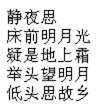

In [23]:
# Run this block to display an image file
from IPython.display import Image as DispImage

# To display an image file that is in the working directory:
# DispImage("ImageName.jpg")
DispImage ("1.png")

The following is the Image Text Tranlsator code block. It is also availabe as the imgtl.py file, which can be run on your local machine with python3. The program will ask you for a file path to your image file. Ideally this will be your working directory, and if so type:

./

In [48]:
from PIL import Image
import pytesseract
from translate import Translator
from PIL import ImageFont, ImageDraw, Image

# The next line may not be needed. It is needed if tesseract is not in your PATH
# (Check path for tesseract and modify the line below if needed)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

def ocr_core(filename):
    """
    This function will handle the core OCR processing of images.
    """
    text = pytesseract.image_to_string(Image.open(filename), lang='chi_sim')
    return text

#writes text extracted from image into a txt file named "script.txt"
def writefile(image_path, strstr):
	wordlist = strstr.split()
	with open(image_path + '/script.txt', 'a') as f:
		f.writelines("\r".join(wordlist))

# takes text extracted from txt file and translates them, outputs translated 
# version into a txt file called "translated.txt" and outputs an image
# file called Capture.JPH.
def translate_text(image_path):
    translator = Translator(to_lang="en", from_lang="zh")
    width = 1000
    height = 1000
    im  = Image.new( mode = "RGB", size = (width, height), color = (255, 255, 255) )

    with open(image_path + '/script.txt', encoding='utf-8') as f:
        contents = f.readlines()

    with open(image_path + '/translated.txt', 'a') as n:
        for line in contents:
            n.writelines(translator.translate(line) + "\n")
            draw = ImageDraw.Draw(im)
            font = ImageFont.truetype("arial.ttf", 15)
            for i in range(9):
                draw.text((10, i*14), translator.translate(line), fill=(0,0,0,0), font=font)
        im.save("Capture.JPG");
        im.show();

# obtain input path and number of files from the user
path = input('file path: ')
nums = input('# of files: ')

# Change the translator provider
# Default is mymemory but it limits the number of translations per day.
# Template code to change provider:
# secret = '<your secret from Microsoft or DeepL>'
# translator = Translator(provider='<the name of the provider, eg. microsoft or deepl>', to_lang=to_lang, secret_access_key=secret)

# I signed up for DeepL account and got this access key but is seems not to be working because mymemory is still used
secret = '4ab5c119-0001-6b9d-8f3a-a7963bbabbe3:fx'
translator = Translator(provider = 'deepl', to_lang="en", secret_access_key=secret)


print("******Starting******")

# This performs the OCR and writes a text file caled script.txt
for n in range(1, int(nums)+1):
    text = ocr_core(path + "/" + str(n) + ".png")
    writefile(path, text)
    print("OCR of image " + str(n) + " is done")

# This performs the translation step (it may take a while)
print("Now performing the translation.")
translate_text(path)

print("~~~~~~Finished~~~~~~")


file path: ./
# of files: 1
******Starting******
OCR of image 1 is done
Now performing the translation.
~~~~~~Finished~~~~~~


The code above generates two text files and an image file. The script.txt file shows the original language, and translated.txt and Capture.JPG show the translation. To see these in the Files panel on the left, click the folder icon with round arrow (to refresh).

In [ ]:
# See at least a part of each of the .txt files that are generated
!echo "The original:"
!head script.txt
!echo "..."
!echo "The translation:"
!head translated.txt
!echo "..."


You can see the output image file by running the next code block. The Capture.JPG file will be over-written the next time the translate_text method is run, so change the file name if you want to save it (or you can download the file: hover over the file name in the Files pane, and the three vertical dots give you the option to download).

In [ ]:
# See the image file:
DispImage ("Capture.JPG")

You need to remove the text files, because otherwise text will be appended to them when the writefile and translate_text methods are next run.

In [47]:
# remove the two text files for another round of playing
! rm script.txt
! rm translated.txt